<ipython-input-7-5f2d2a2a5f4c>:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segmented_means = grouped_data.mean()


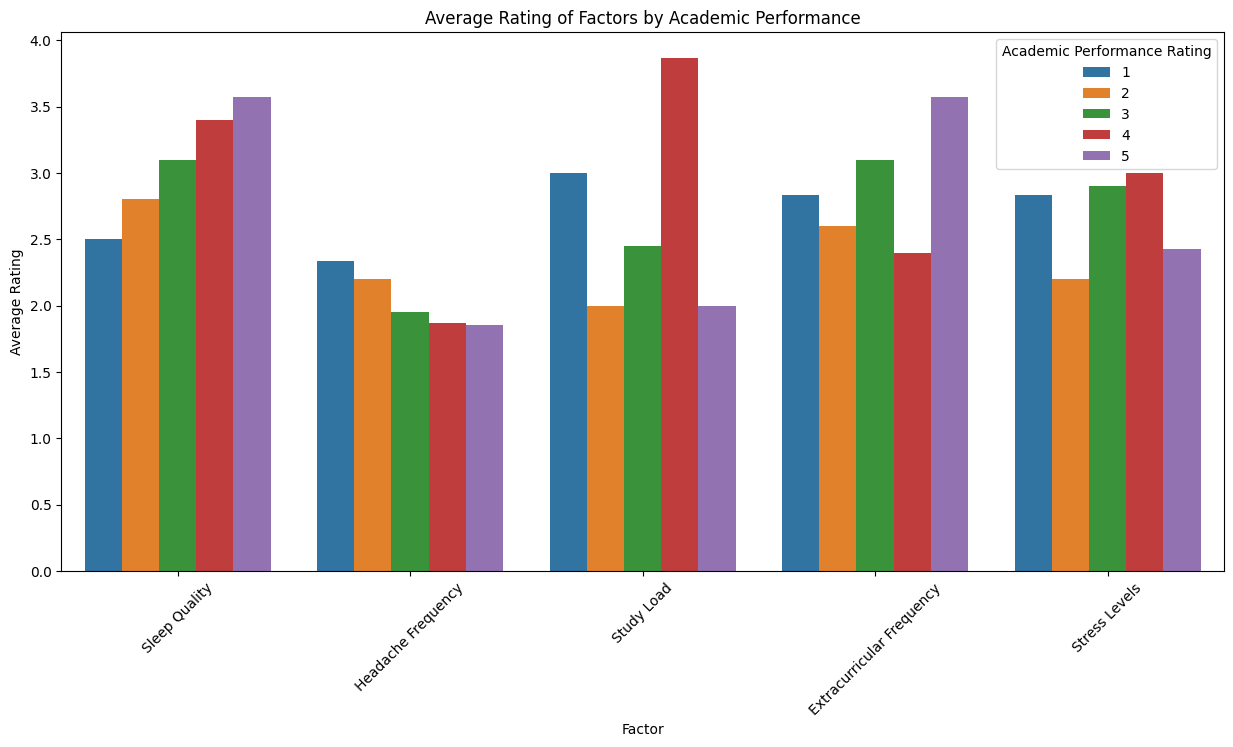

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


def remove_emojis(dataframe):
  cleaned_col_names = {col: re.sub(r'[^\x00-\x7F]+', '', col) for col in dataframe.columns}
  return dataframe.rename(columns=cleaned_col_names)

file_path = '/content/Student Stress Factors.csv'
data = pd.read_csv(file_path)

data_cleaned_columns = remove_emojis(data)

data_cleaned_columns.columns = [
    'Timestamp',
    'Sleep Quality',
    'Headache Frequency',
    'Academic Performance',
    'Study Load',
    'Extracurricular Frequency',
    'Stress Levels'
]

grouped_data = data_cleaned_columns.groupby('Academic Performance')

segmented_means = grouped_data.mean()

segmented_means.reset_index(inplace = True)

segmented_melted = segmented_means.melt(id_vars=['Academic Performance'], var_name='Factor', value_name='Average Rating')

plt.figure(figsize=(15,7))
sns.barplot(data=segmented_melted, x='Factor', y='Average Rating', hue='Academic Performance')
plt.title('Average Rating of Factors by Academic Performance')
plt.xticks(rotation=45)
plt.legend(title='Academic Performance Rating')
plt.show()

The bar plot shows the average ratings of different factors segmented by the student's self-rated academic performance. here are some observations from the plot:

1.Sleep Quality - Students with higher academic performance ratings tend to report better sleep quality on average. this suggests a potential relationship between good sleep and better academic outcomes.

2.Headache Frequency - there does not appear to be a clear trend between academic performance and the frequency of headaches. however, the average number of headaches tends to be lower for students with the highest academic performance rating.

3.Study load - Interestingly, students with the highest academic performance do not necessarily report the heaviest study load. in fact, the study load seems fairly consistent across different levels of academic performance.


4.Extracurricular Activities: There is a slight trend where students with higher acadmeic performance ratings also participate in extracurricular activities more frequently.

5.Stress Levels: Students with the highest academic performance rating report lower stress levels on average, which could suggest that managing stress effectively is associated with better academic performance.